In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [4]:

df = pd.DataFrame()

In [5]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [6]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

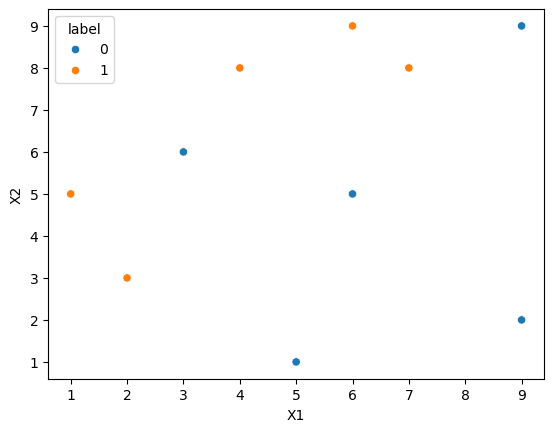

In [8]:
sns.scatterplot(x='X1', y='X2', hue='label', data=df)

In [9]:
df['weights'] = 1/df.shape[0]

In [10]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [12]:
X = df[['X1', 'X2']]
y = df['label']

In [13]:

dt1 = DecisionTreeClassifier(max_depth=1)

In [14]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [15]:
df['y_pred'] = dt1.predict(X)

In [16]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [ ]:
error_factor = np.where(df['y_pred'] != df['label'], df['weights'], 0)
e_m = error_factor.sum() / df['weights'].sum()

accuracy_factor1 = np.log((1 - e_m) / e_m)

print(f"Error Factor: {e_m}, Accuracy Factor: {accuracy_factor1}")

Error Factor: 0.30000000000000004, Accuracy Factor: 0.8472978603872034


In [20]:
#update weights
def update_weights(df, accuracy_factor):
    if df['label'] == df['y_pred']:
        return df['weights'] * np.exp(-accuracy_factor)
    else:
        return df['weights'] * np.exp(accuracy_factor)

In [21]:
df['weights'] = df.apply(lambda row: update_weights(row, accuracy_factor), axis=1)

df['weights'] = df['weights'] / df['weights'].sum()

In [22]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.042857,1
1,2,3,1,0.042857,1
2,3,6,0,0.042857,0
3,4,8,1,0.233333,0
4,5,1,0,0.042857,0
5,6,9,1,0.233333,0
6,6,5,0,0.042857,0
7,7,8,1,0.233333,0
8,9,9,0,0.042857,0
9,9,2,0,0.042857,0


In [23]:
df['weights'].sum()

0.9999999999999997

In [25]:
df['cumsum_upper'] = np.cumsum(df['weights'])

In [27]:

df['cumsum_lower'] = df['cumsum_upper'] - df['weights']

In [28]:
df

,X1,X2,label,weights,y_pred,cumsum_upper,cumsum_lower
0,1,5,1,0.042857,1,0.042857,0.000000
1,2,3,1,0.042857,1,0.085714,0.042857
2,3,6,0,0.042857,0,0.128571,0.085714
3,4,8,1,0.233333,0,0.361905,0.128571
4,5,1,0,0.042857,0,0.404762,0.361905
5,6,9,1,0.233333,0,0.638095,0.404762
6,6,5,0,0.042857,0,0.680952,0.638095
7,7,8,1,0.233333,0,0.914286,0.680952
8,9,9,0,0.042857,0,0.957143,0.914286
9,9,2,0,0.042857,0,1.000000,0.957143


In [29]:

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [33]:

index_values = create_new_dataset(df)

index_values
     

[0, 1, 7, 2, 3, 7, 1, 9, 7, 9]

In [35]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [36]:
second_df

,X1,X2,label,weights
0,1,5,1,0.042857
1,2,3,1,0.042857
7,7,8,1,0.233333
2,3,6,0,0.042857
3,4,8,1,0.233333
7,7,8,1,0.233333
1,2,3,1,0.042857
9,9,2,0,0.042857
7,7,8,1,0.233333
9,9,2,0,0.042857


In [37]:
# second weak classifier


dt2 = DecisionTreeClassifier(max_depth=1)


In [38]:
X = second_df[['X1', 'X2']]
y = second_df['label']

In [39]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [40]:

second_df['y_pred'] = dt2.predict(X)

In [41]:
second_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.042857,1
1,2,3,1,0.042857,1
7,7,8,1,0.233333,1
2,3,6,0,0.042857,1
3,4,8,1,0.233333,1
7,7,8,1,0.233333,1
1,2,3,1,0.042857,1
9,9,2,0,0.042857,0
7,7,8,1,0.233333,1
9,9,2,0,0.042857,0


In [ ]:
error_factor = np.where(second_df['y_pred'] != second_df['label'], second_df['weights'], 0)
e_m = error_factor.sum() / second_df['weights'].sum()

accuracy_factor2 = np.log((1 - e_m) / e_m)

print(f"Error Factor: {e_m}, Accuracy Factor: {accuracy_factor2}")

Error Factor: 0.03600000000000001, Accuracy Factor: 3.287572356154435


In [49]:
#update weights
def update_weights(df, accuracy_factor):
    if df['label'] == df['y_pred']:
        return df['weights'] * np.exp(-accuracy_factor)
    else:
        return df['weights'] * np.exp(accuracy_factor)

In [ ]:
#update weights
def update_weights(df, accuracy_factor):
    if df['label'] == df['y_pred']:
        return df['weights'] * np.exp(-accuracy_factor)
    else:
        return df['weights'] * np.exp(accuracy_factor)

In [51]:
second_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.001344,1
1,2,3,1,0.001344,1
7,7,8,1,0.007320,1
2,3,6,0,0.964000,1
3,4,8,1,0.007320,1
7,7,8,1,0.007320,1
1,2,3,1,0.001344,1
9,9,2,0,0.001344,0
7,7,8,1,0.007320,1
9,9,2,0,0.001344,0


In [53]:
second_df['weights'].sum()

1.0

In [54]:
second_df['cumsum_upper'] = np.cumsum(second_df['weights'])

In [55]:

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['weights']

In [56]:
second_df

,X1,X2,label,weights,y_pred,cumsum_upper,cumsum_lower
0,1,5,1,0.001344,1,0.001344,0.000000
1,2,3,1,0.001344,1,0.002689,0.001344
7,7,8,1,0.007320,1,0.010008,0.002689
2,3,6,0,0.964000,1,0.974008,0.010008
3,4,8,1,0.007320,1,0.981328,0.974008
7,7,8,1,0.007320,1,0.988647,0.981328
1,2,3,1,0.001344,1,0.989992,0.988647
9,9,2,0,0.001344,0,0.991336,0.989992
7,7,8,1,0.007320,1,0.998656,0.991336
9,9,2,0,0.001344,0,1.000000,0.998656


In [66]:
index_values = create_new_dataset(second_df)


index_values

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [67]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
7,7,8,1,0.00732
7,7,8,1,0.00732
7,7,8,1,0.00732
7,7,8,1,0.00732
7,7,8,1,0.00732
7,7,8,1,0.00732
7,7,8,1,0.00732
7,7,8,1,0.00732
7,7,8,1,0.00732
7,7,8,1,0.00732


In [68]:
X = third_df[['X1', 'X2']]
y = third_df['label']

In [69]:
dt3 = DecisionTreeClassifier(max_depth=1)
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [70]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.00732,1
7,7,8,1,0.00732,1
7,7,8,1,0.00732,1
7,7,8,1,0.00732,1
7,7,8,1,0.00732,1
7,7,8,1,0.00732,1
7,7,8,1,0.00732,1
7,7,8,1,0.00732,1
7,7,8,1,0.00732,1
7,7,8,1,0.00732,1


In [ ]:
error_factor = np.where(third_df['y_pred'] != third_df['label'], third_df['weights'], 0)
e_m = error_factor.sum() / third_df['weights'].sum()

accuracy_factor2 = np.log((1 - e_m) / e_m)

print(f"Error Factor: {e_m}, Accuracy Factor: {accuracy_factor3}")

Error Factor: 0.0, Accuracy Factor: inf


C:\Users\Acer\AppData\Local\Temp\ipykernel_15532\1867131623.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  accuracy_factor = np.log((1 - e_m) / e_m)


In [72]:
#update weights
def update_weights(df, accuracy_factor):
    if df['label'] == df['y_pred']:
        return df['weights'] * np.exp(-accuracy_factor)
    else:
        return df['weights'] * np.exp(accuracy_factor)

In [74]:
third_df['weights'] = third_df.apply(lambda row: update_weights(row, accuracy_factor), axis=1)

third_df['weights'] = third_df['weights'] / third_df['weights'].sum()

In [75]:
third_df

,X1,X2,label,weights,y_pred
7,7,8,1,NaN,1
7,7,8,1,NaN,1
7,7,8,1,NaN,1
7,7,8,1,NaN,1
7,7,8,1,NaN,1
7,7,8,1,NaN,1
7,7,8,1,NaN,1
7,7,8,1,NaN,1
7,7,8,1,NaN,1
7,7,8,1,NaN,1


In [ ]:
print(accuracy_factor1,accuracy_factor3)